## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
mouse_data_complete



# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mouse_count = mouse_data_complete["Mouse ID"].unique()

mouse_count

print(f"There are a total of {len(mouse_count)} mice")





There are a total of 249 mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates= mouse_data_complete.loc[mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicates

#mouse_test = mouse_data_complete[mouse_data_complete["Mouse ID"=="g989"]]





array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#mouse_duplicate = mouse_data_complete.loc(mouse_data_complete["Mouse ID"=="g989"])

#mouse_duplicate


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse=mouse_data_complete[mouse_data_complete["Mouse ID"].isin(duplicates) == False]

clean_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_count = clean_mouse["Mouse ID"].unique()

print(f"There are a total of {len(clean_mouse_count)} mice")


There are a total of 248 mice


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

stats_df = clean_mouse.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean = stats_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = stats_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = stats_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev = stats_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = stats_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

statistics_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean,
                             "Median Tumor Volume (mm3)": median,
                             "Variance": variance,
                             "Standard Deviation": std_dev,
                             "SEM": sem})
statistics_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Count by Trial')

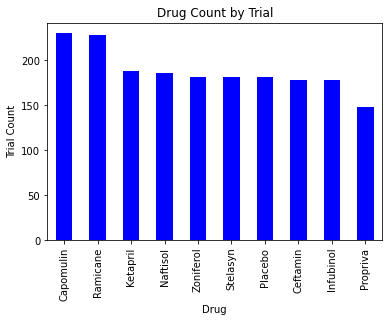

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_count = clean_mouse["Drug Regimen"].value_counts()
x_axis = drug_count.index
y_axis = drug_count.values

drug_count.plot(kind="bar", facecolor="blue")

plt.xlabel("Drug")
plt.ylabel("Trial Count")
plt.title("Drug Count by Trial")



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

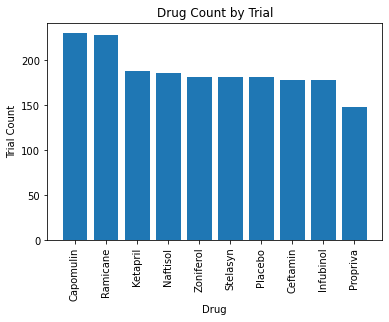

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(x_axis,y_axis)
plt.xlabel("Drug")
plt.ylabel("Trial Count")
plt.title("Drug Count by Trial")
plt.xticks(rotation = 90)

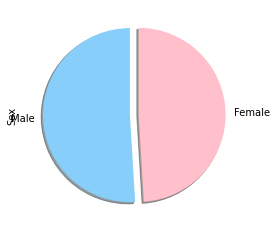

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = clean_mouse["Sex"].value_counts()

labels = mice_count.index
sizes = mice_count.values
explode = (0,.1)
colors = ("lightskyblue","pink")


mice_count.plot(kind="pie", explode = explode,colors = colors,labels = labels,shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x1a23b1c7b8>,
 [Text(-1.0995024239828841, -0.03308201408261565, 'Male'),
  Text(1.1994571897995099, 0.0360894699083073, 'Female')])

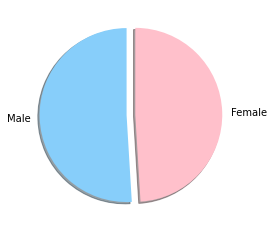

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True, startangle=90)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = clean_mouse.groupby("Mouse ID").max().reset_index()




# Start by getting the last (greatest) timepoint for each mouse
merge_df = final_tumor[["Mouse ID", "Timepoint"]].merge(clean_mouse, on = ["Mouse ID", "Timepoint"], how="left")

merge_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Infubinol", "Ceftamin","Ramicane"]

capomulin= merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane= merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol=merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin= merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
tumors= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 #Capomulin
quant_cap = capomulin.quantile([.25,.5,.75])
low_cap = quant_cap[.25]
up_cap = quant_cap[.75]
iqr = up_cap - low_cap
low_out=low_cap-(1.5*iqr)
high_out=up_cap+(1.5*iqr)
    
print(f"Any number above {high_out} or below {low_out} is an outlier for Capomulin.")
    

 #Infubinol
quant_inf = infubinol.quantile([.25,.5,.75])
low_inf = quant_inf[.25]
up_inf = quant_inf[.75]
iqr2 = up_inf - low_inf
low_out2=low_inf-(1.5*iqr2)
high_out2=up_inf+(1.5*iqr2)
    
print(f"Any number above {high_out2} or below {low_out2} is an outlier for Infubinol.")

 #Ceftamin
quant_cef = ceftamin.quantile([.25,.5,.75])
low_cef = quant_cef[.25]
up_cef = quant_cef[.75]
iqr3 = up_cef - low_cef
low_out3=low_cef-(1.5*iqr3)
high_out3=up_cef+(1.5*iqr3)
    
print(f"Any number above {high_out3} or below {low_out3} is an outlier for Ceftamin.")
    
 #Ramicane
quant_ram = ramicane.quantile([.25,.5,.75])
low_ram = quant_ram[.25]
up_ram = quant_ram[.75]
iqr4 = up_ram - low_ram
low_out4=low_ram-(1.5*iqr4)
high_out4=up_ram+(1.5*iqr4)
    
print(f"Any number above {high_out4} or below {low_out4} is an outlier for Ramicane.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Any number above 51.83201549 or below 20.70456164999999 is an outlier for Capomulin.
Any number above 82.74144559000001 or below 36.83290494999999 is an outlier for Infubinol.
Any number above 87.66645829999999 or below 25.355449580000002 is an outlier for Ceftamin.
Any number above 54.30681135 or below 17.912664470000003 is an outlier for Ramicane.


Text(0.5, 1.0, 'Final Tumor Volumes')

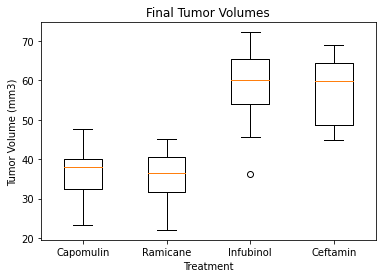

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volumes")


## Line and Scatter Plots

Text(0.5, 1.0, 'Timepoint v Tumor Volume (mm3)')

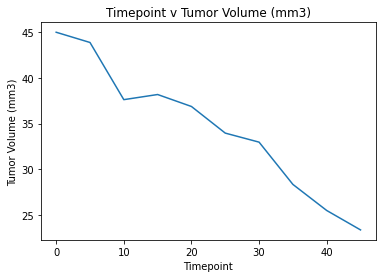

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df= clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]
mouse= clean_mouse.loc[clean_mouse["Mouse ID"] == "s185"]

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint v Tumor Volume (mm3)")




Text(0.5, 1.0, 'Weight (g) v Tumor Volume (mm3)')

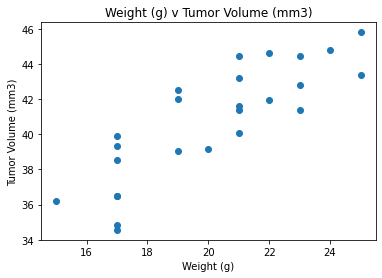

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(average_cap["Weight (g)"], average_cap["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight (g) v Tumor Volume (mm3)")


## Correlation and Regression

Text(0.5, 1.0, 'Weight (g) v Tumor Volume (mm3)')

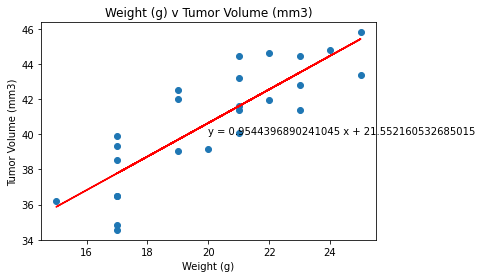

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr)= linregress(average_cap["Weight (g)"],average_cap["Tumor Volume (mm3)"])
regress=average_cap["Weight (g)"]* slope + intercept
line= f"y = {slope} x + {intercept}"

plt.scatter(average_cap["Weight (g)"],average_cap["Tumor Volume (mm3)"])
plt.plot(average_cap["Weight (g)"], regress, color='red')
plt.annotate(line,(20,40))
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight (g) v Tumor Volume (mm3)")
